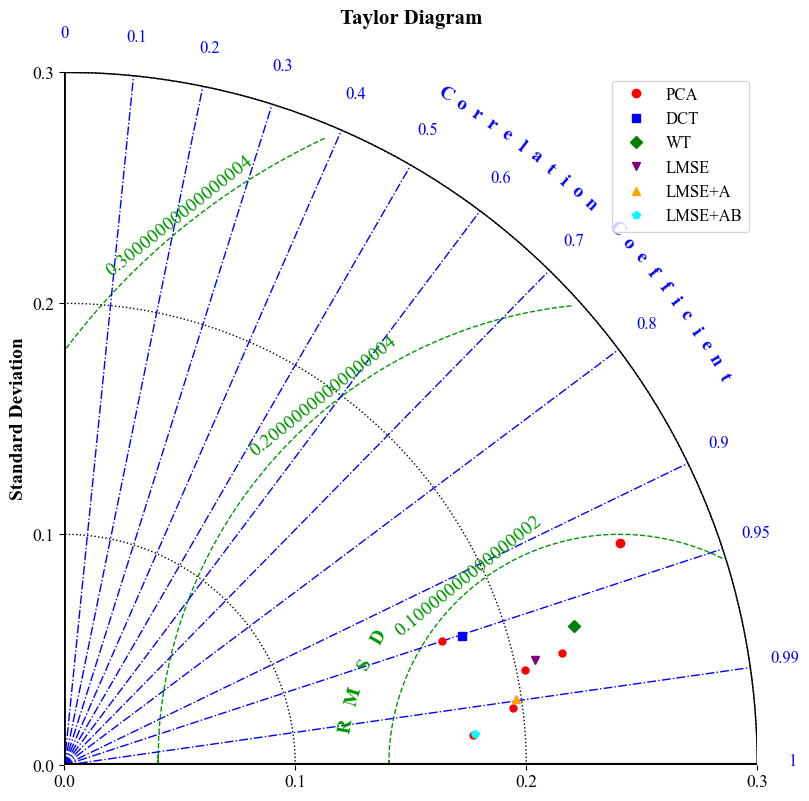

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import pandas as pd
import skill_metrics as sm
from matplotlib.ticker import FormatStrFormatter

# Load data
data = pd.read_excel(r"crack_width_simulation.xlsx")

# Compute Taylor statistics
taylor_stats = [
    sm.taylor_statistics(data.pred1, data.ref, 'data'),
    sm.taylor_statistics(data.pred2, data.ref, 'data'),
    sm.taylor_statistics(data.pred3, data.ref, 'data'),
    sm.taylor_statistics(data.pred4, data.ref, 'data'),
    sm.taylor_statistics(data.pred5, data.ref, 'data'),
    sm.taylor_statistics(data.pred6, data.ref, 'data')
]

# Extract statistics
sdev = np.array([stats['sdev'][1] for stats in taylor_stats])
crmsd = np.array([stats['crmsd'][1] for stats in taylor_stats])
ccoef = np.array([stats['ccoef'][1] for stats in taylor_stats])

# Define colors and markers
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan']
markers = ['o', 's', 'D', 'v', '^', 'p']
labels = ['PCA', 'DCT', 'WT', 'LMSE', 'LMSE+A', 'LMSE+AB']

# Set matplotlib basic configuration
plt.style.use('default')
rcParams["figure.figsize"] = [10, 9]
# rcParams["figure.facecolor"] = "white"
# rcParams["figure.edgecolor"] = "white"
rcParams['lines.linewidth'] = 1
rcParams["font.family"] = "Times New Roman"
rcParams.update({'font.size': 12})

# Create the Taylor Diagram
fig, ax = plt.subplots()
sm.taylor_diagram(sdev, crmsd, ccoef)

# Add markers, colors, and labels
for i, label in enumerate(labels):
    ax.plot(sdev[i], crmsd[i], marker=markers[i], color=colors[i], linestyle='None', label=label)

# Add legend and title
ax.legend(loc='upper right')
plt.title("Taylor Diagram", fontdict={'size':'15','weight':'bold','color':'black'}, pad=35)

plt.savefig('/home/ubuntu/data/workspace/lilong/Crack_width_simulation.jpg', dpi=600, bbox_inches='tight')
plt.show()